In [1]:
# Wine Quality Prediction - Random Forest

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df=pd.read_csv(r'C:\Users\Monica Luna\Desktop\Curso ML\Pandas\winequality-red.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.shape

(1599, 12)

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

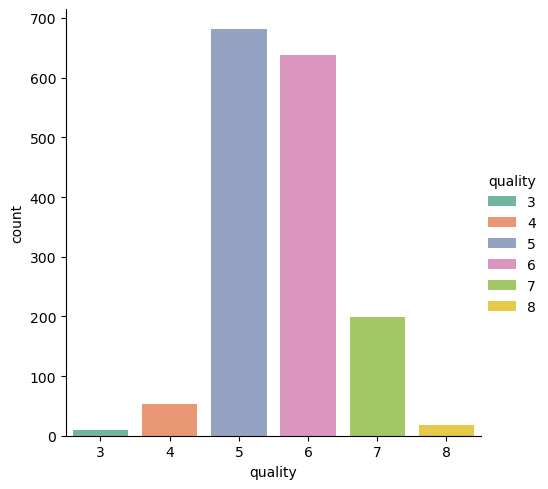

In [15]:
# graficamos el número de valores de acda tipo de quality

sns.catplot(x='quality',data=df, kind='count', hue='quality', palette='Set2')

Text(0, 0.5, 'volatile acidity')

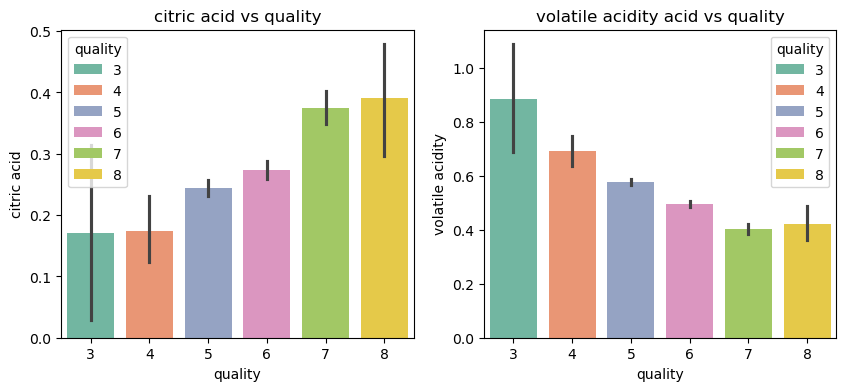

In [17]:
# hacemos otros gráficos
fig , ax=plt.subplots(1,2,figsize=(10,4))
sns.barplot(x='quality',y='citric acid', data=df, ax=ax[0], palette='Set2',hue='quality')
sns.barplot(x='quality',y='volatile acidity', data=df, ax=ax[1], palette='Set2',hue='quality')
ax[0].set_title('citric acid vs quality')
ax[0].set_xlabel('quality')
ax[0].set_ylabel('citric acid')
ax[1].set_title('volatile acidity acid vs quality')
ax[1].set_xlabel('quality')
ax[1].set_ylabel('volatile acidity')

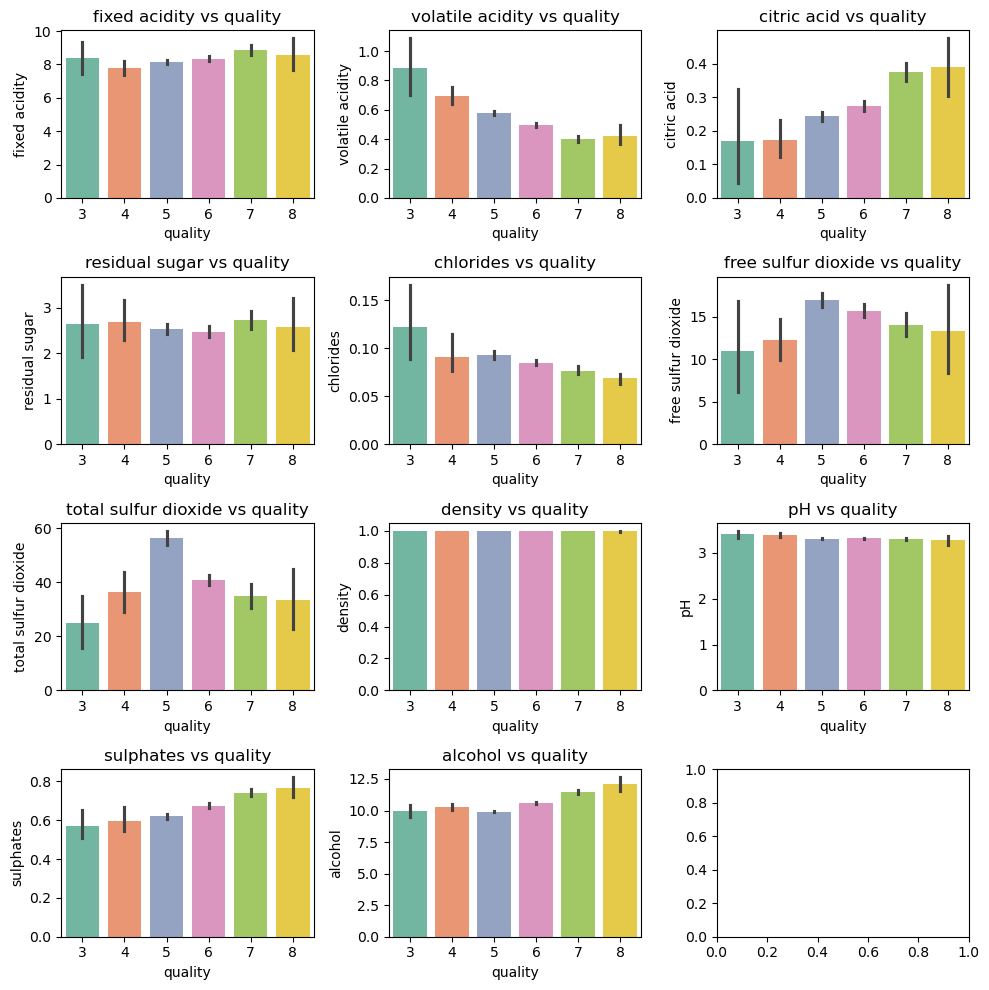

In [19]:
# puedo hacerlo de todas las relaciones
fig , ax=plt.subplots(4,3,figsize=(10,10))
ax=ax.flatten()
rest_columns=[col for col in df.columns if col != 'quality']
i=0
for col in rest_columns:
    sns.barplot(x='quality',y=col, data=df, ax=ax[i], palette='Set2',hue='quality',legend=False)
    ax[i].set_title(f'{col} vs quality')
    ax[i].set_xlabel('quality')
    ax[i].set_ylabel(col)
    i+=1
    
fig.tight_layout()


<Axes: >

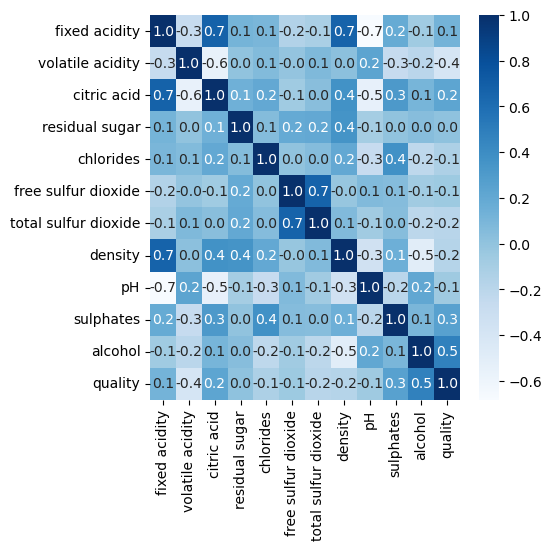

In [21]:
# correlation
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues', fmt='.1f')

In [23]:
# separación de variables
X=df.drop(columns='quality')
y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) # target solo va a tomar valores 0 y 1

In [29]:
print(X.shape, y.shape)

(1599, 11) (1599,)


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [33]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [35]:
# Entrenamos el modelo
model=RandomForestClassifier()

In [37]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
# Evaluamos el modelo - accuracy

X_test_pred=model.predict(X_test)
data_accuracy=accuracy_score(X_test_pred,y_test)

In [45]:
print('Accuracy: ' ,data_accuracy)

Accuracy:  0.934375


In [77]:
# Sistema de predicción
data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) # fila 8
data_np=np.asarray(data)
data_np_reshaped=data_np.reshape(1,-1)


In [79]:
 print(data_np.shape, data_np_reshaped.shape) # el modelo necesita leerlo en formato reshaped (X_train, X_test)

(11,) (1, 11)


In [83]:
model.predict(data_np_reshaped) # obtenemos valor 1 que equivale a quality>=7 (En este caso 7)


C:\Users\Monica Luna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)